# Статистический анализ



### Задача 1
Используя [следующий критерий](http://statistica.ru/theory/znachimost-koeffitsienta-korrelyatsii-doveritelnyy-interval/), проверить, есть ли взаимосвязь между размером мозга интеллектом для совместной выборки мужчин и женщин, а также для каждой из выборок в отдельности.


### Задача 2
Используя критерий [хи-квадрат](http://www.machinelearning.ru/wiki/index.php?title=%D0%A2%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0_%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8), проверить, есть ли различия в выборе авто между мужчинами и женщинами (столбцы `Sex` и `PreferCar`)



                                                Задача 1. Связь размера мозга,пола и показателя интеллекта

In [0]:
df_brain=pd.read_table(path + r'\HW1_task2_brain_data.tsv', sep="\t", engine='python')
df_car=pd.read_table(path + r'\HW1_task2_car_prefs_data.tsv', sep="\t", engine='python' )

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


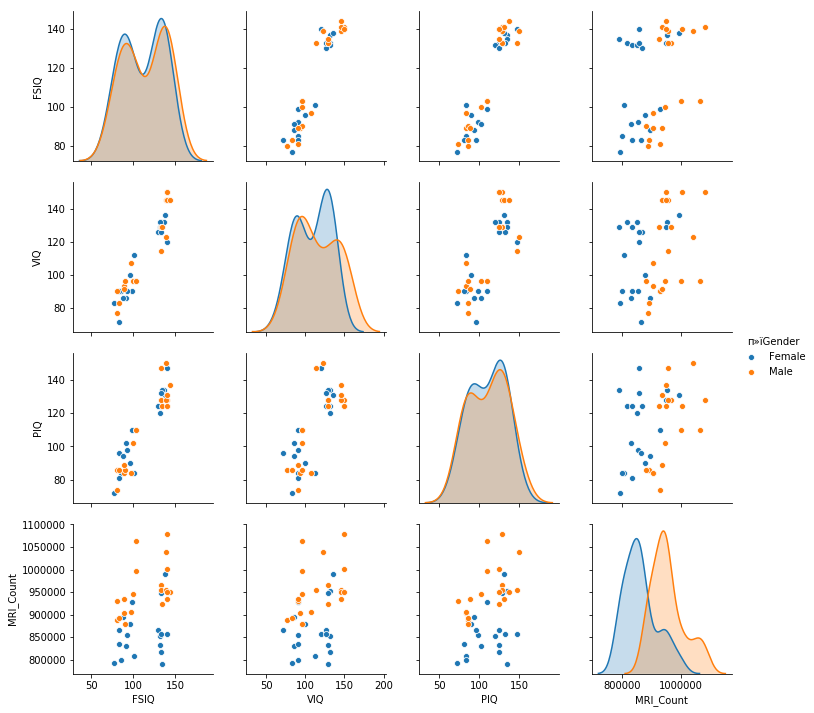

In [0]:
sns.pairplot(df_brain, hue="п»їGender")

В случае FSIQ и PIQ показателей интеллекта распределения имеют бимодальный характер, что может служить признаком наличия внутри гендерных групп двух подгрупп отличных по интеллекту. Будем учитывать это в размере нашей тестовой выборки, при подсчете критерия Стьюдента, и будем приминать n=10 для того что бы учесть значения из обоих групп распределения.Поскольку наши распределения для мужчин и для женщин практически идентичны, проверим 1 выборку на нормальность распределения, предварительно разбив ее на 2 подвыборки. Разбиваем по медиане.

In [0]:
FSIQ_male_1 = stats.shapiro(df_brain[(df_brain['п»їGender'] == 'Male') & (df_brain['FSIQ'] <118.000000)]['FSIQ'])
print('p-value: ', FSIQ_male_1[1])
FSIQ_male_2 = stats.shapiro(df_brain[(df_brain['п»їGender'] == 'Male') & (df_brain['FSIQ'] >118.000000)]['FSIQ'])
print('p-value: ', FSIQ_male_2[1])


p-value:  0.24514861404895782
p-value:  0.1986357569694519


Полученные значения говорят нам о том что обе группы распределения относятся к нормальным

In [0]:
print("--------------------------------------------------")
print("Коэффициенты корреляция для всей выборки")
print(df_brain.corr("pearson"))
print(df_brain.corr("spearman"))
print("--------------------------------------------------")
print("Коэффициенты корреляция для выборки женщин")
print(df_brain[df_brain['п»їGender'] == 'Female'].corr("pearson"))
print(df_brain[df_brain['п»їGender'] == 'Female'].corr("spearman"))
print("--------------------------------------------------")
print("Коэффициенты корреляция для выборки мужчин")
print(df_brain[df_brain['п»їGender'] == 'Male'].corr("pearson"))
print(df_brain[df_brain['п»їGender'] == 'Male'].corr("spearman"))

--------------------------------------------------
Коэффициенты корреляция для всей выборки
               FSIQ       VIQ       PIQ  MRI_Count
FSIQ       1.000000  0.946639  0.934125   0.357641
VIQ        0.946639  1.000000  0.778135   0.337478
PIQ        0.934125  0.778135  1.000000   0.386817
MRI_Count  0.357641  0.337478  0.386817   1.000000
               FSIQ       VIQ       PIQ  MRI_Count
FSIQ       1.000000  0.918054  0.878695   0.472142
VIQ        0.918054  1.000000  0.714980   0.399814
PIQ        0.878695  0.714980  1.000000   0.412461
MRI_Count  0.472142  0.399814  0.412461   1.000000
--------------------------------------------------
Коэффициенты корреляция для выборки женщин
               FSIQ       VIQ       PIQ  MRI_Count
FSIQ       1.000000  0.955717  0.939382   0.325697
VIQ        0.955717  1.000000  0.802652   0.254933
PIQ        0.939382  0.802652  1.000000   0.396157
MRI_Count  0.325697  0.254933  0.396157   1.000000
               FSIQ       VIQ       PIQ  MRI_Coun

Как видно у нас есть сильная корелляционная связь между признаками интеллекта (r>0.7) для всех выборок вне зависимости от пола. Между размером мозга и интеллектуальными показателями корелляционная связь слабая (0.3<r<0.5).
Соотвественно можно предположить что показатели интеллекта могут быть связаны между собой в некий единый "абсолютный IQ"
И наоборот сделать предположение об отсутсвии линейной связи между размером мозга и интеллектуальными способностями
Проверим это утверждение с помощью гистограмм для размера мозга у мужчин и женщин.

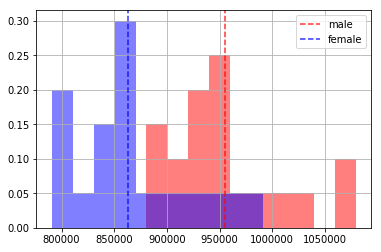

In [0]:
x = df_brain[df_brain['п»їGender'] == 'Male']['MRI_Count']
y = df_brain[df_brain['п»їGender'] == 'Female']['MRI_Count']
x.name, y.name = 'male', 'female'

def two_histograms(x, y):
    """
    Функция, для построения двух гистограмм на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.

    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x),color='red', bins=10)
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y), color='blue', bins=10)
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

two_histograms(x,y)

В распределении есть очевидные выбросы, которые не дают применить критерий Стюдента. Можно было бы попробовать избавиться от них, но первой (красной) гистограмме это не поможет. Выброс у неё всего один, и его удаление не сделает данные более нормальными: слишком уж большой крайний левый столбик. Тогда можно поробовать применить непараметрические критерии. Критерий Уилкоксона применим только для парных выборок. У нас же в разных выборках находятся разные объекты (мужчины и женщины). Поэтому нам остаётся критерий Манна-Уитни.
Нулевая гипотеза состоит в том что величина мозга не зависит от пола

In [0]:
res = stats.mannwhitneyu(x, y)
print('значение статистики:', res[0])
print('p-value:', res[1])

значение статистики: 46.0
p-value: 1.6465529538661105e-05


p-value получилось маленьким, поэтому отвергаем гипотезу о равенстве медиан. Вывод:размер мозга зависит от пола

In [0]:
m=10**2
n=10
averages_man = list()
averages_woman = list()

In [0]:
for df_brain[df_brain['п»їGender'] == 'Male']['FSIQ'] in range(m):
    sample1 = df_brain[df_brain['п»їGender'] == 'Male']['FSIQ'].sample(n).values
    sample2 = df_brain[df_brain['п»їGender'] == 'Male']['VIQ'].sample(n).values
    sample3 = df_brain[df_brain['п»їGender'] == 'Male']['PIQ'].sample(n).values
    x1 = np.mean(sample1)
    x2 = np.mean(sample2)
    x3 = np.mean(sample3)
    averages_man.append(x1)
    averages_man.append(x2)
    averages_man.append(x3)

for df_brain[df_brain['п»їGender'] == 'Female']['FSIQ'] in range(m):
    sample1 = df_brain[df_brain['п»їGender'] == 'Female']['FSIQ'].sample(n).values
    sample2 = df_brain[df_brain['п»їGender'] == 'Female']['VIQ'].sample(n).values
    sample3 = df_brain[df_brain['п»їGender'] == 'Female']['PIQ'].sample(n).values
    x11 = np.mean(sample1)
    x22 = np.mean(sample2)
    x33 = np.mean(sample3)
    averages_woman.append(x11)
    averages_woman.append(x22)
    averages_woman.append(x33)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [0]:

"""

 Оченка доверительного интервала
 t-статистика Стьюдента

"""

m1 =array([averages_man])
m2 =array([averages_woman]) # список средних значений

# Распределение Стьюдента
alfa=0.05              # уровень значимости
tcr=t.ppf(1-alfa/2)
n1=m1.size-1            # число степеней свободы
t1=stats.t(n1)
n2=m2.size-1 
t2=stats.t(n2)

# Оценка
print ("ожидаемое среднее значение уровня интеллекта для мужчин", mean(m1))
print ("доверительный интервал", tcr*std(m1)/sqrt(m1.size))
print ("ожидаемое среднее значение уровня интеллекта для женщин", mean(m2))
print ("доверительный интервал", tcr*std(m2)/sqrt(m2.size))


ожидаемое среднее значение уровня интеллекта для мужчин 113.77166666666666
доверительный интервал 0.644636715090362
ожидаемое среднее значение уровня интеллекта для женщин 110.89733333333335
доверительный интервал 0.5959242075663572


Подведем итоги:
1 Размер мозга зависит от пола.
2 Среднее значение "абсолютного IQ" у мужчин-113.77 ± 0.64 пунктов, у женщин-110.89 ± 0.594 пунктов.Разница между ними статистически незначима
3 Таким образом можно сделать вывод что интеллектуальным способности не зависят от пола и размера мозга.При том что в среднем мужской мозг больше.


                                               Задача 2.2. Задача о выборе класса машины в зависимости от пола

In [0]:
df_car.head()

,ID,Age,Sex,LicYr,LicMth,ActCar,Kids5,Kids6,PreferCar,Car15K,...,Reliable,Perform,Fuel,Safety,AC/PS,Park,Room,Doors,Prestige,Colour
0,110,18,2,0,2,3,2,2,2,2,...,4,3,3,3,3,3,3,3,3,2
1,111,25,1,8,0,1,2,2,1,1,...,4,4,4,4,3,4,4,2,3,3
2,112,63,2,46,0,3,2,2,3,2,...,3,3,3,3,3,3,3,3,3,3
3,113,51,1,35,0,3,2,2,2,2,...,3,3,3,4,3,3,3,3,1,3
4,114,19,1,2,0,2,2,2,2,1,...,3,4,3,3,2,3,3,2,3,3


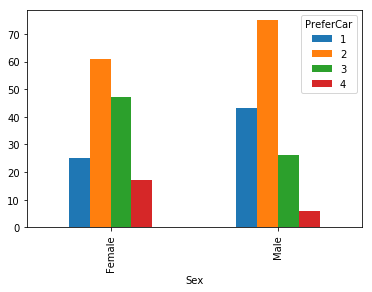

In [0]:
d = {1 : 'Male', 2 : 'Female'}
df_car['Sex'] = df_car['Sex'].map(d)
contingency_table=pd.crosstab(df_car['Sex'], df_car['PreferCar'] )
contingency_table.plot.bar()

Анализируя столбчатую диаграмму можно сделать несколько выводов: 
1 Для обоих выборок наиболее популярным является 2 класс автомобиля и наименее популярным 4 класс
2 Разница в выборе между мужчинами и женщинами при покупке автомобиля заключается в выборе между 1 и 3 классом автомобиля
3 Таким образом анализ постановка нулевой гипотезы (гипотеза о равенстве долей) выглядит следующим образом "Выбор машины не зависит от пола покупателя"
4 Альтернативная гипотеза (доли не равны) : "Выбор автомобиля зависит от пола покупателя".

In [0]:
res = stats.chi2_contingency(contingency_table)
print('статистика критерия: ', res[0])
print ('p-value: {0}'.format(res[1]))
print ('число степеней свободы: ', res[2])

статистика критерия:  17.507847808569526
p-value: 0.0005555699275518034
число степеней свободы:  3


Значение статистики критерия Т=17,5, В соответствии с условиями применения двустороннего критерия хи-квадрат для одной степени свободы (k=4-l=3) и уровня значимости a=0,05 найдем Ткритич = 7,815. Отсюда верно неравенство Тнаблюд>Ткритич (17,5>7,815) и наше p-value < уровня значимости. Согласно правилу принятия решений для критерия хи-квадрат, полученный результат дает нам основания для отклонения нулевой гипотезы. 
Вывод: Выбор класса машины  зависит от пола покупателя

# Задание 3

Данные для анализа:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016



1) Для любой страны 
 *  Сделайте визуализацию колонки suicides_no, учитывая переменные sex, age (или generation) и год
 *  Проверьте есть ли статистически значимые различия по количеству суицидов среди групп: мужчины / женщины. Если обнаружены статистически значимые различия, то можно ли сказать, что люди определенного пола более склонны к суицидам или нужна дополнительная информация?

2) Для 2016 года: разбейте страны на 3-4 группы согласно значениям переменной gdp_per_capita (используйте статистические характеристики, чтобы определить как именно разбивать данные на группы), проверьте различается ли показатель suicides/100k pop в этих группах. Не забывайте, что для каждой страны вы имеете несколько значений и их нужно агрегировать или проверять для каждой группы отдельно.

Выбранная страна-Япония

In [0]:

df_suicide=pd.read_csv(path + r'\master.csv.gz', compression='gzip', sep=",", encoding='utf-8')

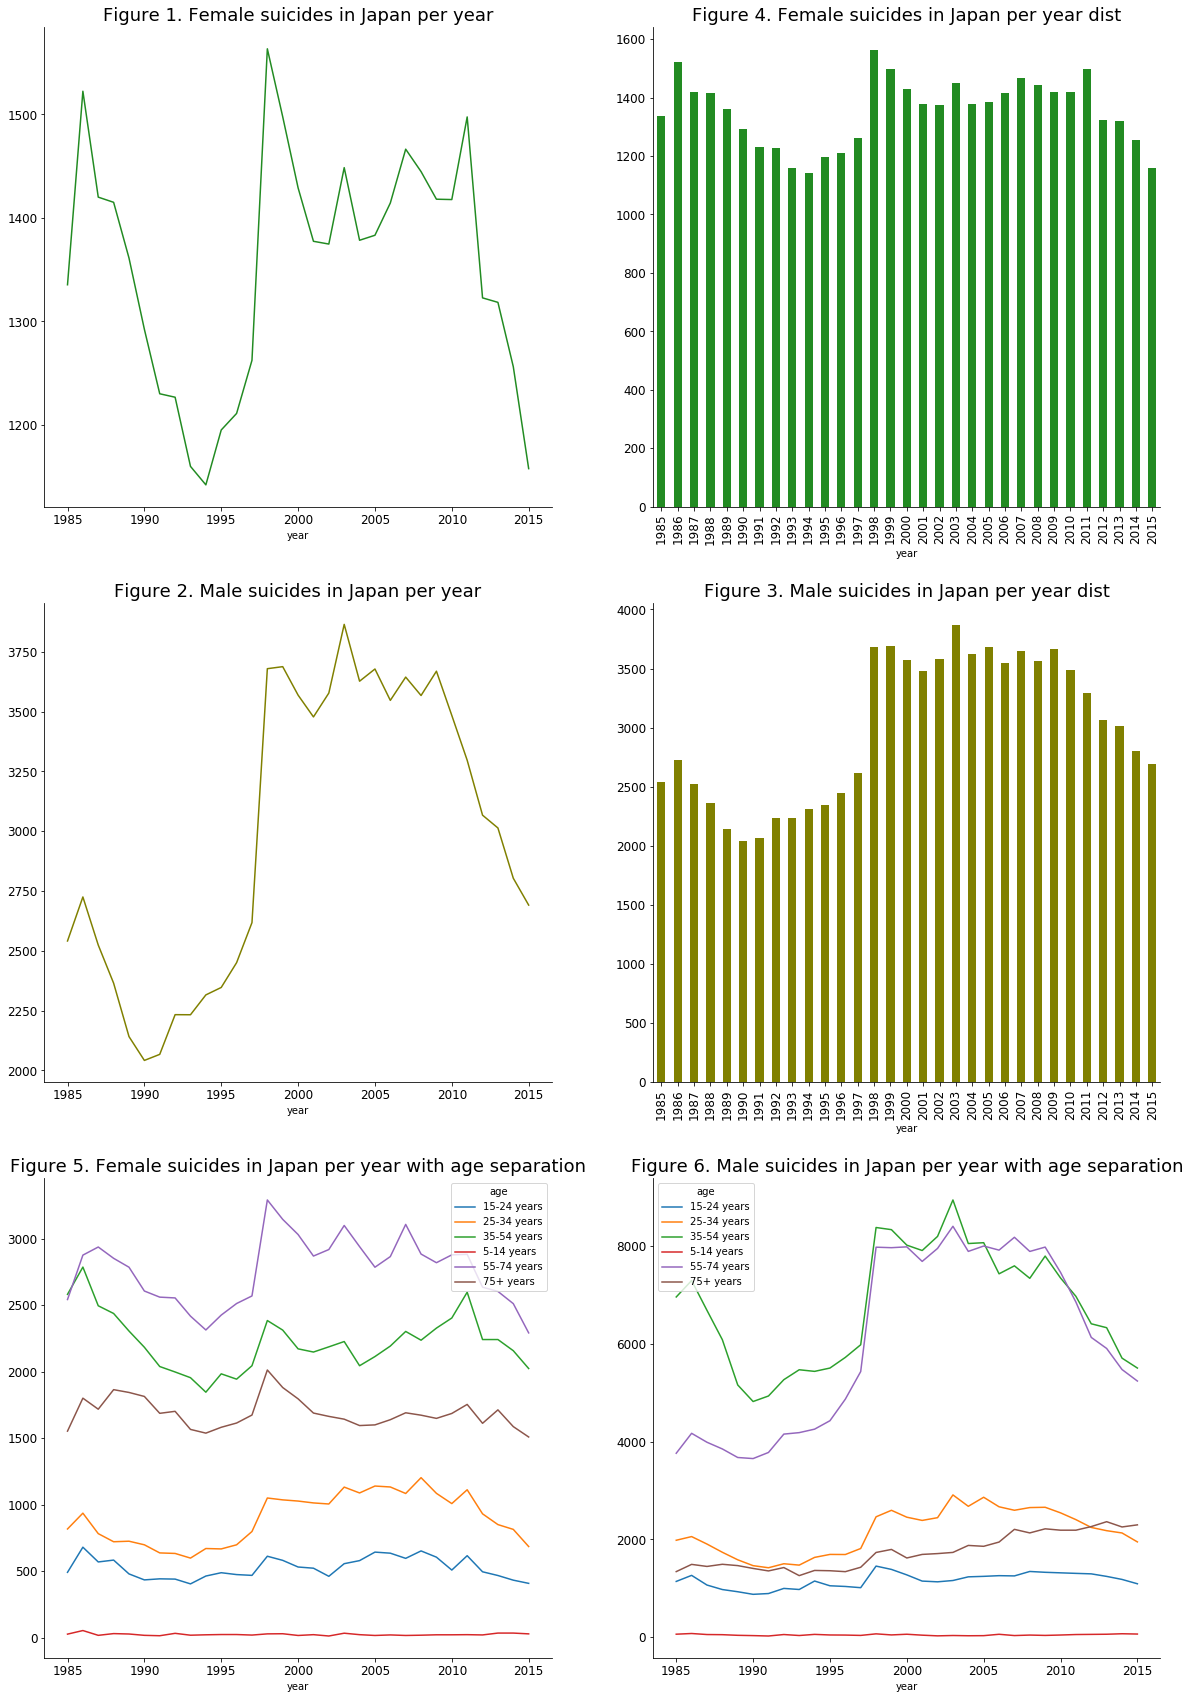

In [0]:
fig, axes = plt.subplots(3, 2, figsize=(20, 30))

    
df_suicide[(df_suicide['sex']=='female')&(df_suicide['country']=='Japan')].groupby('year')['suicides_no'].mean().plot.line(
    ax=axes[0][0], fontsize=12, color='forestgreen',stacked=True
)
axes[0][0].set_title("Figure 1. Female suicides in Japan per year", fontsize=18)

df_suicide[(df_suicide['sex']=='male')&(df_suicide['country']=='Japan')].groupby('year')['suicides_no'].mean().plot.line(
    ax=axes[1][0], fontsize=12, color='olive'
)
axes[1][0].set_title("Figure 2. Male suicides in Japan per year", fontsize=18)

df_suicide[(df_suicide['sex']=='male')&(df_suicide['country']=='Japan')].groupby('year')['suicides_no'].mean().plot.bar(
    ax=axes[1][1], fontsize=12, color='olive', 
)
axes[1][1].set_title("Figure 3. Male suicides in Japan per year dist", fontsize=18)

df_suicide[(df_suicide['sex']=='female')&(df_suicide['country']=='Japan')].groupby('year')['suicides_no'].mean().plot.bar(
    ax=axes[0][1], fontsize=12, color='forestgreen',
)
axes[0][1].set_title("Figure 4. Female suicides in Japan per year dist", fontsize=18)

df_suicide[(df_suicide['sex']=='female')&(df_suicide['country']=='Japan')].pivot_table('suicides_no', index='year', columns='age', aggfunc='mean').plot(
    ax=axes[2][0], fontsize=12,
)
axes[2][0].set_title("Figure 5. Female suicides in Japan per year with age separation", fontsize=18)

df_suicide[(df_suicide['sex']=='male')&(df_suicide['country']=='Japan')].pivot_table('suicides_no', index='year', columns='age', aggfunc='mean').plot(
    ax=axes[2][1], fontsize=12, 
)
axes[2][1].set_title("Figure 6. Male suicides in Japan per year with age separation", fontsize=18)

plt.subplots_adjust(hspace=0.2)

sns.despine()

Итак какие выводы можно сделать глядя на наши графики:

1 Динамика самоубийств среди мужчин и женщин имеет схожий тренд, но слегка смещенные "подъемы" и "впадины" (разница 1-3 года).
Все резкие изменения тренда берут свое начало в одно и то же время для обоих групп (резки скачок в 1993-1995 и резкое падение в 2010)

2.Сопоставляя графики 3 и 4 можно сделать о значимых статистиеских различиях в числе самоубийстви среди мужчин и женщин в Японии. Среднее значение числа самоубийств среди мужчин почти в 2 раза превышает среднее значение самоубийств среди женщин (~3100 против ~1480)

3.Вывод: Мужчины в Японии чаще склонны к самоубийствам.

                                         Число самоубийств в зависимости от возрастной категории
                                                      
                                                        
1.Среди женщин практически отсутсвуют "аномалии" по количеству самоубийств в зависимости от возраста:
    11. Для возрастной группы 55-74 года есть аномальный участок между 1995 и 2000 годом,где происходит скачок до значения ~3200
    и дальше идут локальные спады и подъемы.
    12.Как можно судить по графику 1, пик женских суицидов пришелся на ~1997 год и согласно графику 5, мы можем отметить рост 
    числа суицидов у всех возрастных групп,кроме группы 5-14 лет. Можно предположить, что причиной послужило какое-либо 
    социальное или культурное явление, которое затронуло все "пласты" женского социума.
    13. С взрослением у женщин Японии  растете число самоубийств, за исключением возрастной группы 75+. Можно предположить, что 
    причиной является "консерватизм" и моральные принципы старшего поколения женщин.
2.Среди мужчин присутствуют две ярко выраженные  "аномалии" по количеству самоубийств в зависимости от возраста:
    21. Для возрастной группы 35-54 и 55-74 года есть аномальный участок между 1996 и 1997 годом,где происходит резкий скачок от 
    значения ~6000 до значения ~8000,то есть почти на треть за 1 год .
    22.Как можно судить по графику 2, пик мужских суицидов пришелся на ~1997 год и согласно графику 5, мы можем отметить рост 
    числа суицидов у всех возрастных групп,кроме группы 5-14 лет. Однако по сравнению с женской выборкой крутизна роста 
    количества самоубийств у мужских группп 15-24, 24-35, +75 лет выражена менее явно. Можно сделать вывод что "социальный 
    отклик" в разных возрастных мужских группах менее вероятен, в силу строгой вертикальной иерархической социальной структуры
    японского общества.
    23. Резкий спад числа самоубийств в двух мужских "группах опастности" 35-54 и 55-74 года совпал по времени с одновременным 
    скачкообразным ростом числа самоубийства во всех возрастных группах среди женщин (конечно же кроме детей и пожилых людей, 
    чем было сказано выше).
 

      Анализ числа самоубийств среди всех возрастных групп, стран, ранжинрованных по уровню ВВП на душу населения.

В качестве статистических критериев для разбивки страны на группы будем использовать квартили:
1 группа- "бедные страны" gdp_per_capita ($)<Q1

2 группа- Q1<"средний класс" <Q3
                                                   
3 группа- "богатые страны">Q3

Как видно из показателей ниже использовать среднее арифметическое нецелесообразно, так оно является смещенной оценкой из-за выбросов в виде "богатых страны".Поэтому принимаем квартили.

In [0]:
df_2016=df_suicide[(df_suicide['year']==2016)]
df_2016['gdp_per_capita ($)'].describe()

count      160.000000
mean     25665.125000
std      21243.939779
min       3788.000000
25%      10432.500000
50%      14595.000000
75%      47259.000000
max      64708.000000
Name: gdp_per_capita ($), dtype: float64

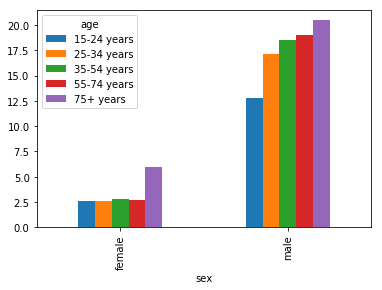

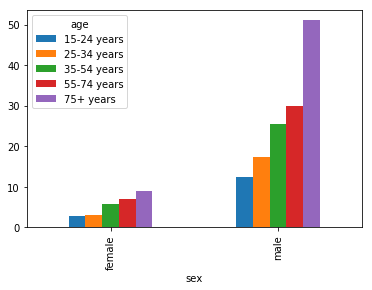

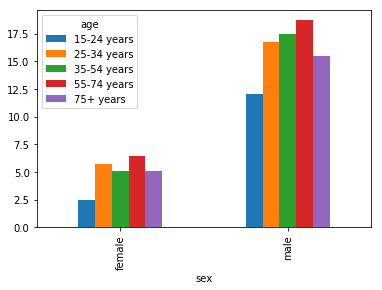

In [0]:
df_2016[(df_2016['gdp_per_capita ($)']<10432.500000)].pivot_table('suicides/100k pop', ['sex'], columns='age').plot.bar()
df_2016[(df_2016['gdp_per_capita ($)']>10432.500000)&(df_2016['gdp_per_capita ($)']<47259.000000)].pivot_table('suicides/100k pop', ['sex'], columns='age').plot.bar()
df_2016[(df_2016['gdp_per_capita ($)']>47259.000000)].pivot_table('suicides/100k pop', ['sex'], columns='age').plot.bar()

                                        Число самоубийств в зависимости от возрастной категории и ВВП на душу населения
                                                                                                           
1 "Бедные страны" и "Страны среднего класса" имеют общие черты и небольшие различия при распределении количества самоубийств по возрастам:
(+) Сходства: Сущетсвенная разница между количеством самоубийств у среди женщин и мужчин (перевес в 2-3 раза в пользу мужчин)
              Для всех гендерных выборок идет возрастание числа самоубийств при росте возраста среди населения.


(-) Различия: В "странах среднего класса" присутсвует ощутимый скачок в числе самоубийстви при переходе от группы 55-74 к 75+
              такого скачка не наблюдается в "бедных странах"
              

2 В "богатых странах" ситуация несколько другая. Они имеют распределение числа самоубийств по возрастам визуально схожее с нормальным распределением( сильное заявление ). Статистика самоубийств здесь распределена более равномерно, а так же среднее значения числа самоубийств находиться в диапозоне близком к значению для "бедных стран".

3 Вывод: для стран с ВВП на душу населения <Q3, финансовый показатель влияет на число самоубийств среди населения (оно растет с течением возраста). Для "богатых" стран такое предположение выдвинуть нельзя, поскольку срденее значение находиться в диапозоне близком к значению для "бедных стран" и статистика распределена более равномерно.Следовательно причина в чем-то другом. 